In [23]:
import sys
sys.path.append('C:/Program Files/Stata17/utilities')
from pystata import config
# Try a different edition if you're not sure which one you have
config.init('se')  # Try Stata/SE instead of MP
# Or
config.init('be')  # Try Stata/BE

In [24]:
import tempfile
import os
import pandas as pd
from pystata import stata

# Step 1: Load the Stata dataset via pystata
stata.run('use "Finalized_PSLM_Sheikhupura.dta", clear')

# Optionally, run any preprocessing commands in Stata here:
# stata.run('drop if missing(some_variable)')
# stata.run('keep if condition')

# Step 2: Create a temporary CSV file for exporting data
temp_csv = tempfile.NamedTemporaryFile(delete=False, suffix=".csv")
temp_csv.close()  # Close the file so that Stata can write to it

# Export the dataset to the temporary CSV file using Stata's export command
stata.run(f'export delimited using "{temp_csv.name}", replace')

# Step 3: Read the exported CSV into a Pandas DataFrame
df = pd.read_csv(temp_csv.name,low_memory=False)

# (Optional) Remove the temporary file now that the data is loaded
os.unlink(temp_csv.name)

# Verify the data loaded correctly
print(df.head())

file C:\Users\PMLS\AppData\Local\Temp\tmpkgx8_0o2.csv saved
      hhcode      psu province region     district  idc relationship_to_head  \
0  234100103  2341001   punjab  rural  sheikhupura    3         son/daughter   
1  234100103  2341001   punjab  rural  sheikhupura    4         son/daughter   
2  234100104  2341001   punjab  rural  sheikhupura    6         son/daughter   
3  234100104  2341001   punjab  rural  sheikhupura    5         son/daughter   
4  234100104  2341001   punjab  rural  sheikhupura    4         son/daughter   

      reason_for_headship  gender residence_status  ...  annual_income  \
0  main economic provider  female          present  ...            NaN   
1  main economic provider    male          present  ...            NaN   
2  main economic provider  female          present  ...            NaN   
3  main economic provider  female          present  ...            NaN   
4  main economic provider    male          present  ...            NaN   

   financial_a

In [25]:
# categorical_features = df.select_dtypes(include=['object', 'category']).columns
# print("Number of categorical features:", len(categorical_features))
# print("Categorical features:")
# print(categorical_features.tolist())


In [26]:
features = [
    'age', 'birth_last_3yrs', 'born_district_type', 'born_in_district', 'can_do_math', 
    'can_read', 'can_report_income', 'can_write', 'computer_location', 'connected_to_sewerage', 
    'cooking_water_source', 'disability', 'dwelling_type', 'employment_status', 
    'first_prenatal_visit_month', 'gender', 'handwashing_water_source', 'has_computer', 
    'has_handwashing_place', 'has_internet', 'has_job', 'has_mobile', 'has_mobile_phone', 
    'has_property','total_household_income', 
    'house_owner_gender', 'household_member', 'household_ran_out_of_food', 
    'hungry_but_did_not_eat', 'income_used_for_hh','marital_status', 
    'migration_reason', 'monthly_income', 'no_computer_reason', 'no_mobile_reason', 
    'num_prenatal_visits', 'num_rooms', 'pay_for_water', 'prenatal_consultation_source', 
    'prenatal_consultations', 'property_owner_gender', 'reason_for_headship', 'region', 
    'relationship_to_head', 'residence_status', 'sick_last_2wks', 'shared_toilet', 
    'sufficient_drinking_water', 'toilet_type', 'used_computer', 'used_mobile', 
    'work_days_last_month', 'worked_last_month', 'worried_about_food', 'disability', 'has_mobile_phone',
    'relationship_to_head','house_owner_gender','years_to_complete_primary'
    
]


In [27]:
 target = 'edu_access'
 # Separate features and target variable
 X = df[features]
 y = df[target]


In [28]:
column_list = X.columns.tolist()
print(column_list)

['age', 'birth_last_3yrs', 'born_district_type', 'born_in_district', 'can_do_math', 'can_read', 'can_report_income', 'can_write', 'computer_location', 'connected_to_sewerage', 'cooking_water_source', 'disability', 'dwelling_type', 'employment_status', 'first_prenatal_visit_month', 'gender', 'handwashing_water_source', 'has_computer', 'has_handwashing_place', 'has_internet', 'has_job', 'has_mobile', 'has_mobile_phone', 'has_property', 'total_household_income', 'house_owner_gender', 'household_member', 'household_ran_out_of_food', 'hungry_but_did_not_eat', 'income_used_for_hh', 'marital_status', 'migration_reason', 'monthly_income', 'no_computer_reason', 'no_mobile_reason', 'num_prenatal_visits', 'num_rooms', 'pay_for_water', 'prenatal_consultation_source', 'prenatal_consultations', 'property_owner_gender', 'reason_for_headship', 'region', 'relationship_to_head', 'residence_status', 'sick_last_2wks', 'shared_toilet', 'sufficient_drinking_water', 'toilet_type', 'used_computer', 'used_mobi

In [29]:
# Encode categorical variables
X = pd.get_dummies(X)


In [30]:
X = X.loc[:, ~X.columns.duplicated()]


In [31]:
column_list = X.columns.tolist()
print(column_list)

['age', 'first_prenatal_visit_month', 'has_property', 'total_household_income', 'household_ran_out_of_food', 'hungry_but_did_not_eat', 'monthly_income', 'num_prenatal_visits', 'num_rooms', 'prenatal_consultations', 'property_owner_gender', 'work_days_last_month', 'worried_about_food', 'years_to_complete_primary', 'birth_last_3yrs_3', 'birth_last_3yrs_rural', 'born_district_type_rural', 'born_district_type_urban', 'born_in_district_no', 'born_in_district_yes', 'can_do_math_no', 'can_do_math_yes', 'can_read_no', 'can_read_yes', 'can_report_income_annually', 'can_report_income_monthly', 'can_report_income_recieve only in kind', 'can_write_no', 'can_write_yes', 'computer_location_  home', 'computer_location_education place', 'connected_to_sewerage_no, no system', 'connected_to_sewerage_yes under ground drain', 'connected_to_sewerage_yes, to covered drain', 'connected_to_sewerage_yes, to open drain', 'cooking_water_source_ motor pump / tube well', 'cooking_water_source_bottled water', 'cook

In [32]:
duplicates = X.columns[X.columns.duplicated()]
print(duplicates)


Index([], dtype='object')


In [33]:
X = X[X.columns.drop(list(X.filter(regex='-1')))]

In [34]:
from sklearn.preprocessing import MinMaxScaler
 # Assuming X is a pandas DataFrame
scaler = MinMaxScaler()
 # Convert the scaled array back to a DataFrame (optional)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
 # Calculate correlations
correlations = X.corrwith(y)

C:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [35]:
column_list = X.columns.tolist()
print(column_list)


['age', 'first_prenatal_visit_month', 'has_property', 'total_household_income', 'household_ran_out_of_food', 'hungry_but_did_not_eat', 'monthly_income', 'num_prenatal_visits', 'num_rooms', 'prenatal_consultations', 'property_owner_gender', 'work_days_last_month', 'worried_about_food', 'years_to_complete_primary', 'birth_last_3yrs_3', 'birth_last_3yrs_rural', 'born_district_type_rural', 'born_district_type_urban', 'born_in_district_no', 'born_in_district_yes', 'can_do_math_no', 'can_do_math_yes', 'can_read_no', 'can_read_yes', 'can_report_income_annually', 'can_report_income_monthly', 'can_report_income_recieve only in kind', 'can_write_no', 'can_write_yes', 'computer_location_  home', 'computer_location_education place', 'connected_to_sewerage_no, no system', 'connected_to_sewerage_yes under ground drain', 'connected_to_sewerage_yes, to covered drain', 'connected_to_sewerage_yes, to open drain', 'cooking_water_source_ motor pump / tube well', 'cooking_water_source_bottled water', 'cook

In [36]:
 # Convert correlations to a DataFrame for better printing
corr_df = pd.DataFrame(correlations.abs().sort_values(ascending=False), columns=['Correlation'])

In [37]:
 # Print all correlations
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
 print(corr_df)


                                                    Correlation
age                                                    0.446492
can_read_no                                            0.400005
worked_last_month_yes                                  0.328464
can_do_math_no                                         0.288861
income_used_for_hh_yes                                 0.285413
can_report_income_monthly                              0.282258
monthly_income                                         0.266787
has_mobile_none of above                               0.265518
employment_status_yes (can't do at all)                0.262653
total_household_income                                 0.254241
has_mobile_mobile phone                                0.186237
employment_status_5                                    0.155814
income_used_for_hh_no income reported                  0.144126
has_mobile_smart phone                                 0.142860
has_job_not but seeking work            

In [38]:
 # Filter for correlations with absolute value greater than 0.01
 selected_features = correlations[abs(correlations) >= 0.01].index
 print(len(X.columns))
 print(len(selected_features))

149
118


In [39]:
 # Filter for correlations with absolute value greater than 0.05
 # Keep only the selected columns in X
 X = X[selected_features]
 print(len(X.columns))

118


In [41]:
# handling the missing values
missing_counts = X.isnull().sum()
thresh = 1000
cols_to_remove = missing_counts[missing_counts > thresh].index.tolist()
print(cols_to_remove)

['total_household_income', 'monthly_income', 'property_owner_gender', 'work_days_last_month']


In [42]:
X = X.drop(columns=cols_to_remove)

In [43]:
#encoding the catagorical variables
y = pd.get_dummies(y)

In [44]:
from sklearn.model_selection import train_test_split
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Making Random Forest Model

In [45]:
import numpy as np

y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)


In [46]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100,  # number of trees
                                  random_state=42,
                                  n_jobs=-1)         # use all processors

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a detailed classification report
print(classification_report(y_test, y_pred))

# Optionally, display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.9024390243902439
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       252
           1       0.90      0.97      0.93       568

    accuracy                           0.90       820
   macro avg       0.90      0.86      0.88       820
weighted avg       0.90      0.90      0.90       820

Confusion Matrix:
 [[191  61]
 [ 19 549]]


y_train shape: (3280,)
y_test shape: (820,)


                                           feature  importance
0                                              age    0.378083
9                                      can_read_no    0.068856
7                                   can_do_math_no    0.026855
61                          income_used_for_hh_yes    0.020322
113                          worked_last_month_yes    0.019332
2                               worried_about_food    0.019100
10                                    can_read_yes    0.015492
1                                     has_property    0.013506
69     no_computer_reason_don’t know how to use it    0.013389
12                       can_report_income_monthly    0.012715
50                        has_mobile_none of above    0.011881
14                                   can_write_yes    0.011851
8                                  can_do_math_yes    0.011348
101     toilet_type_flush connected  to open drain    0.010660
43                        has_handwashing_place_no    0

C:\Users\PMLS\AppData\Local\Temp\ipykernel_24712\3542814801.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top30, palette="viridis")


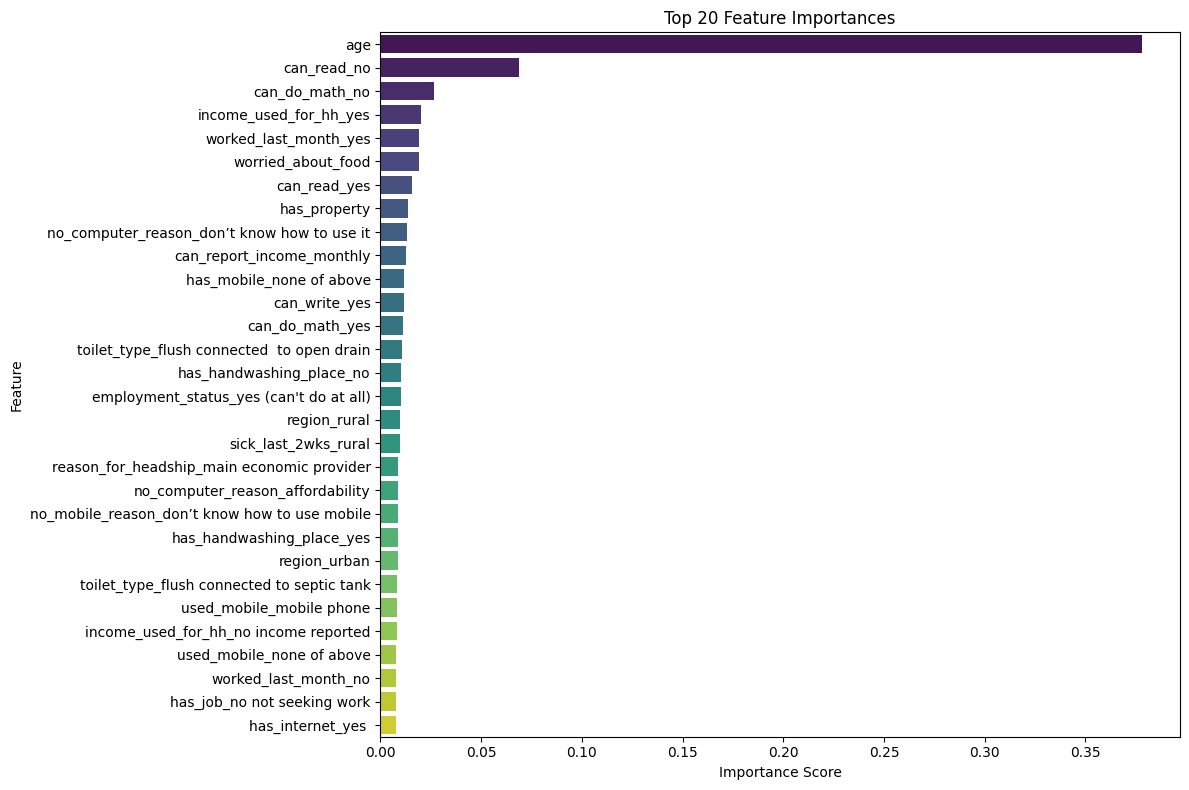

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with feature names and their corresponding importance scores
feat_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})

# Sort the DataFrame in descending order of importance
feat_importances = feat_importances.sort_values(by='importance', ascending=False)

# Get the top 20 features
top30 = feat_importances.head(30)

# Print the top 20 features
print(top30)

# Optional: visualize the top 20 features using a horizontal bar plot
plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=top30, palette="viridis")
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [48]:
import shap

C:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [199]:
# explainer = shap.Explainer(model, X_train)
# shap_values = explainer.shap_values(X_test)

PermutationExplainer explainer: 821it [05:56,  2.25it/s]                                                               


In [ ]:
# test_data = X_test

100%|===================| 1637/1640 [03:28<00:00]        

Full SHAP values shape: (820, 114, 2)
SHAP values for class 1 shape: (820, 114)
Subset SHAP values shape: (300, 114)


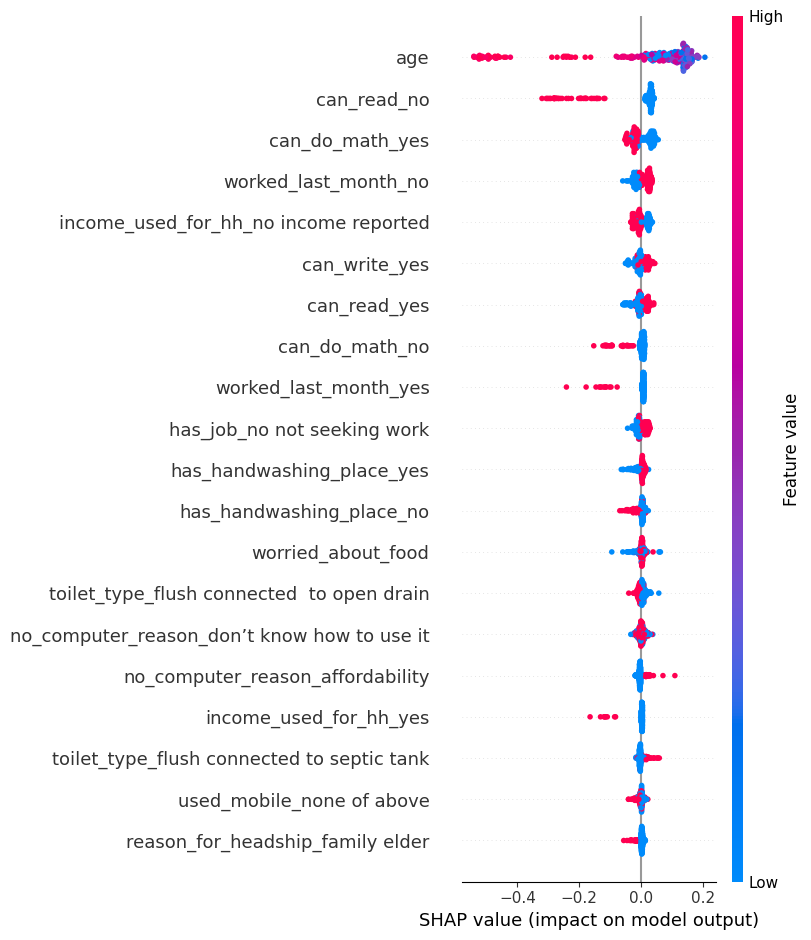

<Figure size 640x480 with 0 Axes>

In [50]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------
# 1. Create a subset of your test data for visualization
# -------------------------------
# Use the first 300 samples for faster plotting.
X_test_subset = X_test.iloc[:300]

# -------------------------------
# 2. Initialize the Explainer using the universal SHAP Explainer for your Random Forest model
# -------------------------------
explainer = shap.Explainer(rf_model, X_train)

# -------------------------------
# 3. Compute SHAP values on the entire test set, disabling the additivity check.
# -------------------------------
shap_values = explainer(X_test, check_additivity=False)
print("Full SHAP values shape:", shap_values.values.shape)  # Expected: (820, n_features, n_classes)

# -------------------------------
# 4. Extract SHAP values for the positive class (index 1)
# -------------------------------
shap_values_class1 = shap_values.values[:, :, 1]
print("SHAP values for class 1 shape:", shap_values_class1.shape)  # Expected: (820, n_features)

# -------------------------------
# 5. Subset the SHAP values to match the subset of test data
# -------------------------------
shap_values_subset = shap_values_class1[:300, :]
print("Subset SHAP values shape:", shap_values_subset.shape)  # Expected: (300, n_features)

# -------------------------------
# 6. Create the SHAP summary plot for feature importance using the subset
# -------------------------------
plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values_subset,         # SHAP values for the positive class, subset to 300 samples
    X_test_subset,              # Subset of test data for visualization
    feature_names=X_train.columns  # Feature names from your training data
)
plt.tight_layout()
plt.savefig('shap_summary_plot.png', dpi=300)
plt.show()


100%|===================| 1638/1640 [03:44<00:00]        

Full SHAP values shape: (820, 114, 2)
SHAP values for class 1 shape: (820, 114)


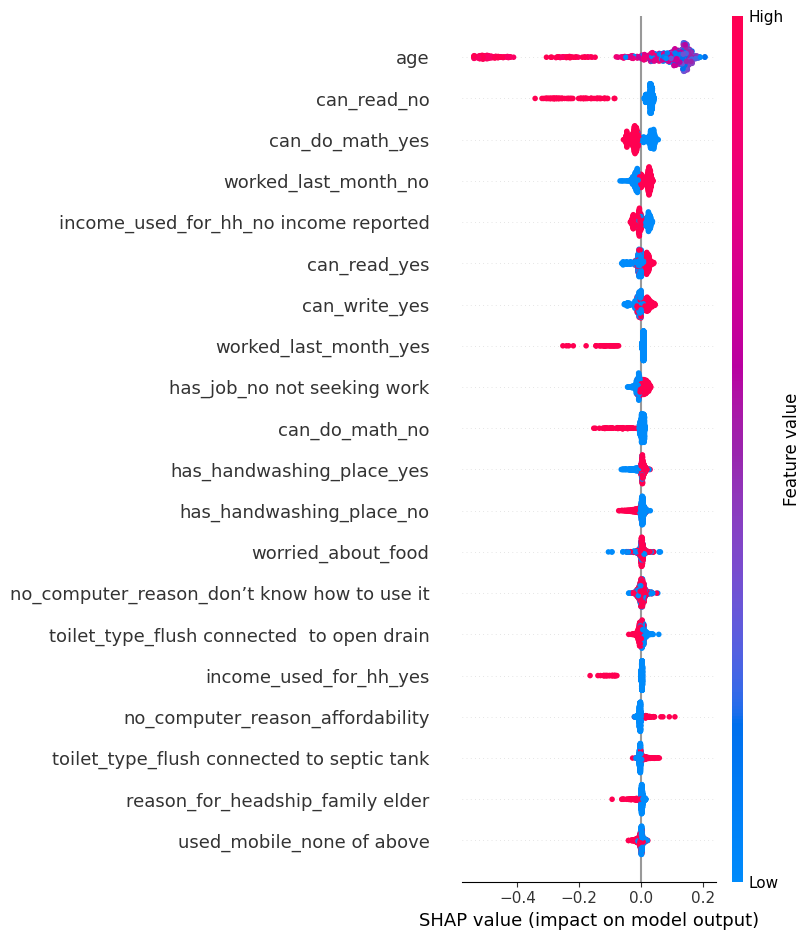

<Figure size 640x480 with 0 Axes>

In [52]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------
# 1. Use the entire test set for visualization
# -------------------------------
X_test_subset = X_test  # Using the entire test set

# -------------------------------
# 2. Initialize the Explainer for your Random Forest model
# -------------------------------
explainer = shap.Explainer(rf_model, X_train)
  
# -------------------------------
# 3. Compute SHAP values on the entire test set, disabling the additivity check.
# -------------------------------
shap_values = explainer(X_test, check_additivity=False)
print("Full SHAP values shape:", shap_values.values.shape)  
# Expected shape: (n_samples, n_features, n_classes) e.g. (820, 114, 2)

# -------------------------------
# 4. Extract SHAP values for the positive class (index 1)
# -------------------------------
shap_values_class1 = shap_values.values[:, :, 1]
print("SHAP values for class 1 shape:", shap_values_class1.shape)  
# Expected shape: (n_samples, n_features)

# -------------------------------
# 5. Use all SHAP values (matching the entire test set)
# -------------------------------
shap_values_subset = shap_values_class1  # using entire test set

# -------------------------------
# 6. Create the SHAP summary plot for feature importance using the full test set
# -------------------------------
plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values_subset,         # SHAP values for the positive class for all samples
    X_test_subset,              # The full test set
    feature_names=X_train.columns  # Feature names from your training data
)
plt.tight_layout()
plt.savefig('shap_summary_plot_full.png', dpi=300)
plt.show()


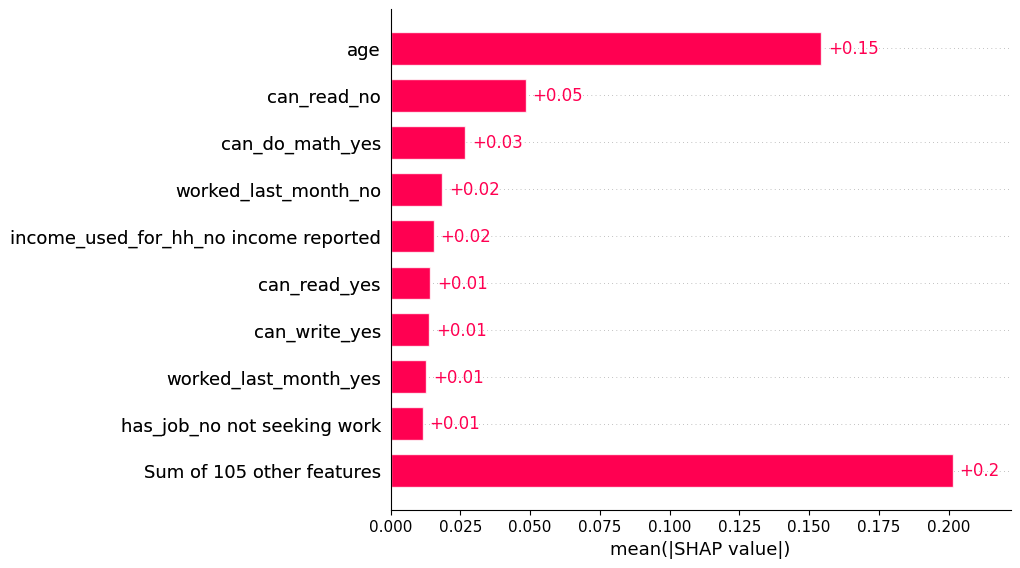

<Figure size 640x480 with 0 Axes>

In [69]:
shap_values_exp = shap.Explanation(
    values=shap_values_subset, 
    base_values=explainer.expected_value[1], 
    data=X_test_subset, 
    feature_names=X_train.columns.to_list()
)

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
shap.plots.bar(shap_values_exp)

plt.savefig('shap_bar_plot.png', dpi=150, bbox_inches='tight')  # Save the plot
plt.show()


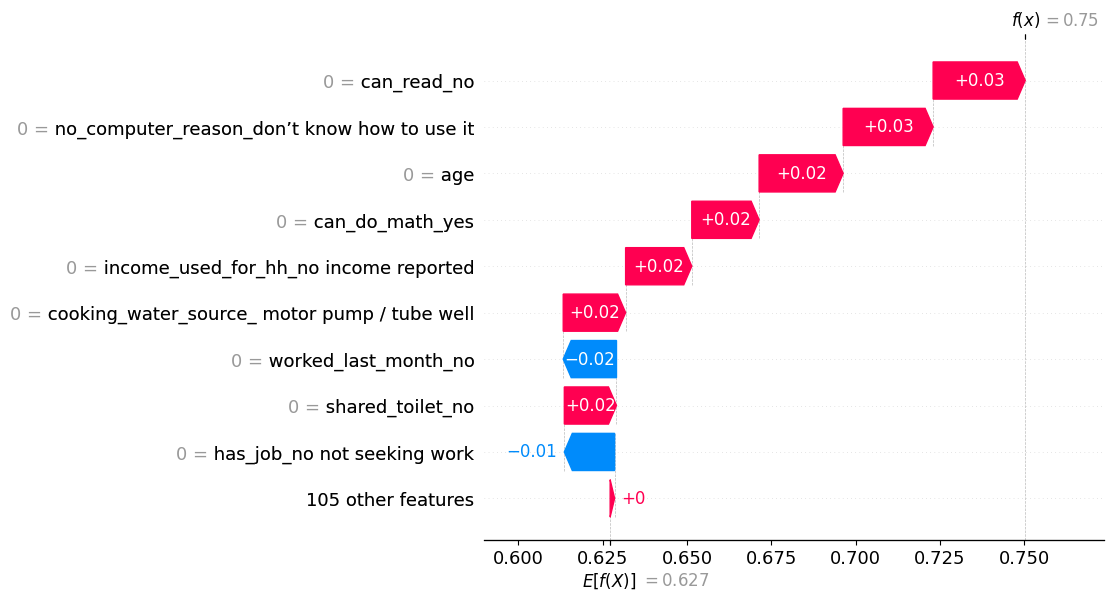

<Figure size 640x480 with 0 Axes>

In [53]:
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_subset[0],  # SHAP values for the first instance
        base_values=explainer.expected_value[1],  # Expected model output for class 1
        data=X_test_subset.iloc[0],  # Feature values for the first instance
        feature_names=X_train.columns.to_list()
    )
)
plt.savefig('shap_waterfall_plot.png', dpi=150)
plt.show()


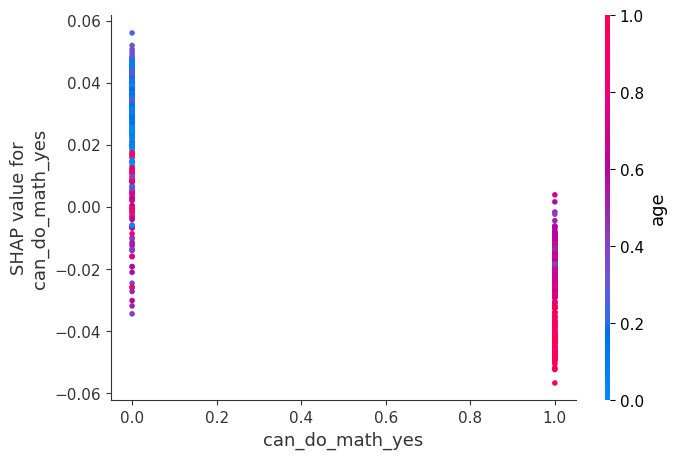

<Figure size 640x480 with 0 Axes>

In [55]:
feature_to_analyze = "can_do_math_yes"  # Replace with an actual feature name
shap.dependence_plot(
    feature_to_analyze, 
    shap_values_subset, 
    X_test_subset
)
plt.savefig(f'shap_dependence_{feature_to_analyze}.png', dpi=150)
plt.show()


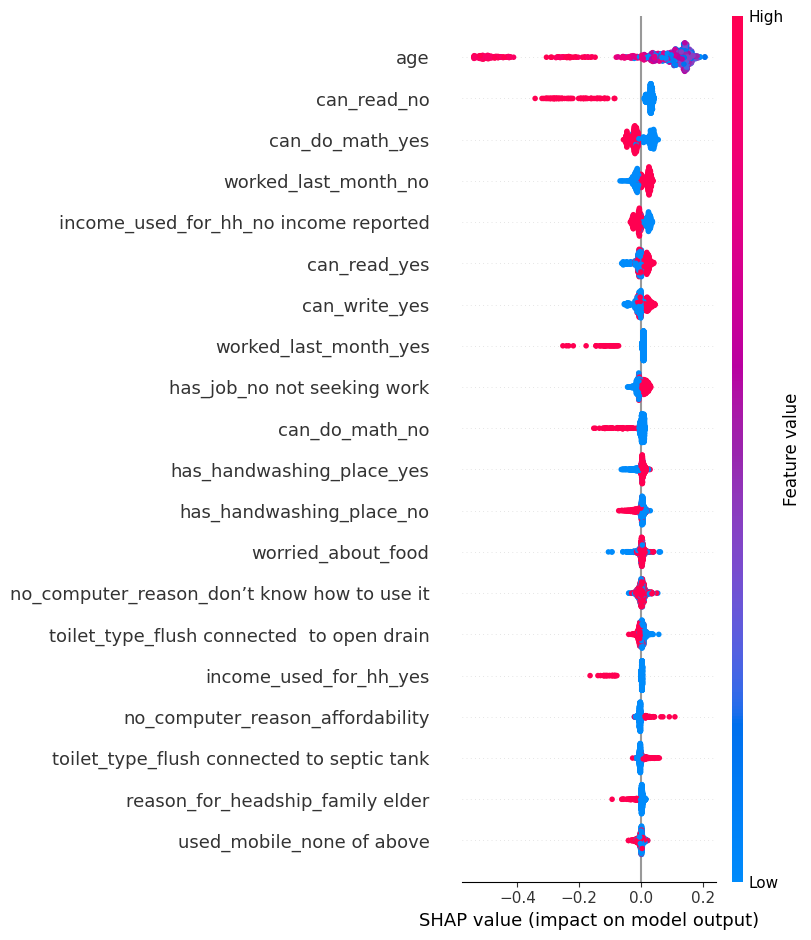

<Figure size 640x480 with 0 Axes>

In [56]:
plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values_subset, X_test_subset)
plt.savefig('shap_beeswarm_plot.png', dpi=150)
plt.show()


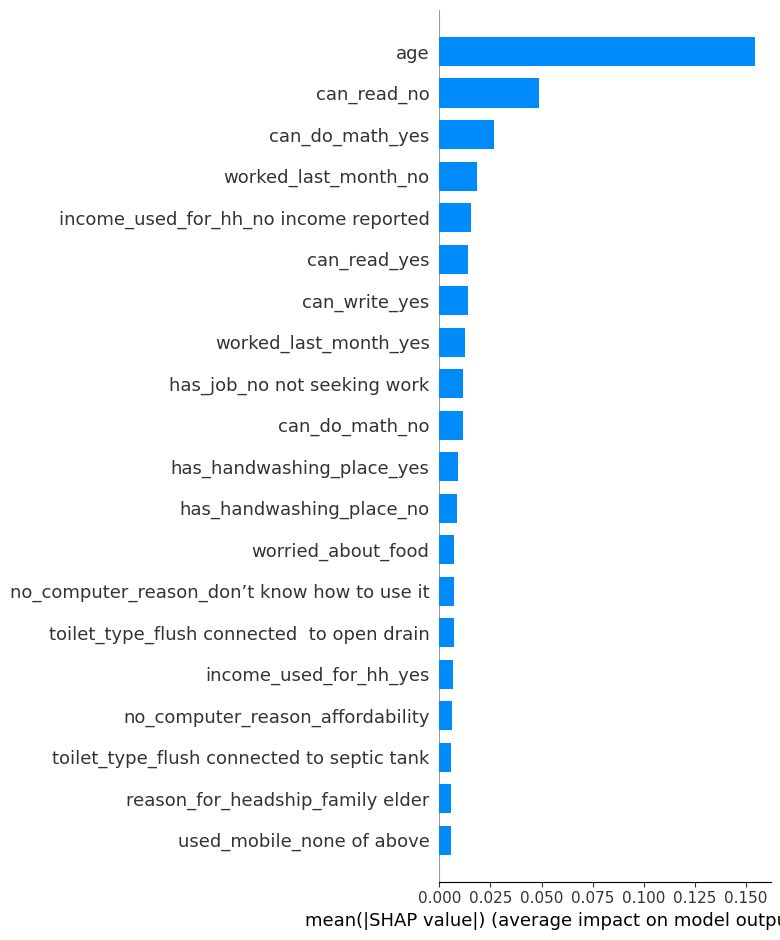

<Figure size 640x480 with 0 Axes>

In [57]:
plt.figure(figsize=(8, 6))
shap.summary_plot(
    shap_values_subset, 
    X_test_subset, 
    feature_names=X_train.columns, 
    plot_type="bar"
)
plt.tight_layout()
plt.savefig('shap_feature_importance_bar.png', dpi=150)
plt.show()


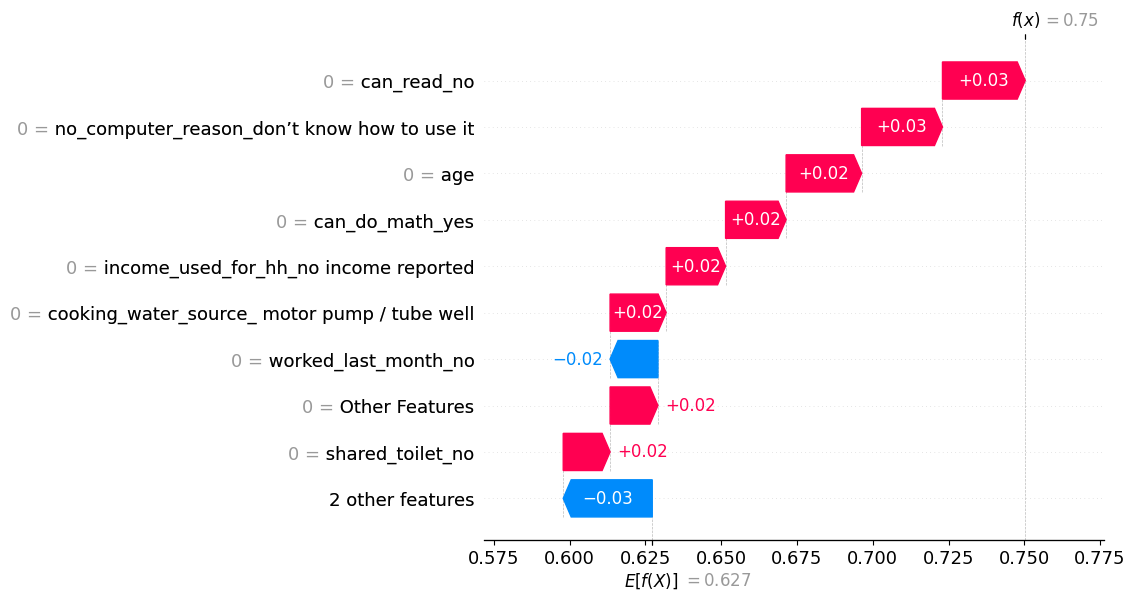

<Figure size 640x480 with 0 Axes>

In [58]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Number of top features to show in the waterfall plot
top_n = 10  

# Extract SHAP values for the first sample
shap_vals = shap_values_subset[0]
feature_names = X_train.columns.to_list()
base_value = explainer.expected_value[1]

# Sort SHAP values by absolute importance
sorted_indices = np.argsort(np.abs(shap_vals))[::-1]  # Descending order
shap_vals_sorted = shap_vals[sorted_indices]
feature_names_sorted = [feature_names[i] for i in sorted_indices]
feature_values_sorted = X_test_subset.iloc[0, sorted_indices]

# Keep only top N features, sum the rest into "Other Features"
if len(shap_vals_sorted) > top_n:
    other_features_sum = np.sum(shap_vals_sorted[top_n:])
    shap_vals_trimmed = np.append(shap_vals_sorted[:top_n], other_features_sum)
    feature_names_trimmed = feature_names_sorted[:top_n] + ["Other Features"]
    feature_values_trimmed = np.append(feature_values_sorted[:top_n], 0)  # No specific value for "Other Features"
else:
    shap_vals_trimmed = shap_vals_sorted
    feature_names_trimmed = feature_names_sorted
    feature_values_trimmed = feature_values_sorted

# Create the SHAP Waterfall Plot
shap.waterfall_plot(
    shap.Explanation(
        values=shap_vals_trimmed,
        base_values=base_value,
        data=feature_values_trimmed,
        feature_names=feature_names_trimmed
    )
)

# Save the figure
plt.savefig('shap_waterfall_plot_modified.png', dpi=150)
plt.show()


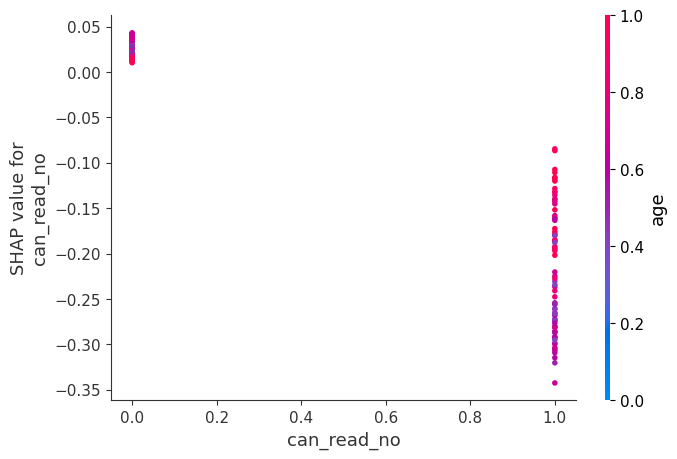

In [62]:
shap.dependence_plot("can_read_no", shap_values_subset, X_test_subset)


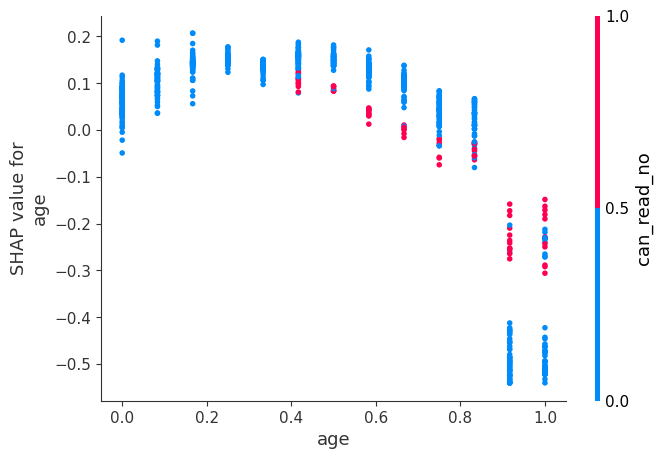

In [64]:
shap.dependence_plot("age", shap_values_subset, X_test_subset)

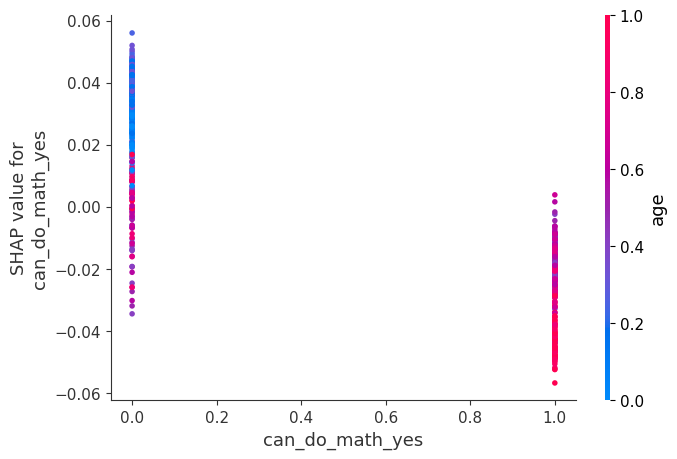

In [65]:
shap.dependence_plot("can_do_math_yes", shap_values_subset, X_test_subset)

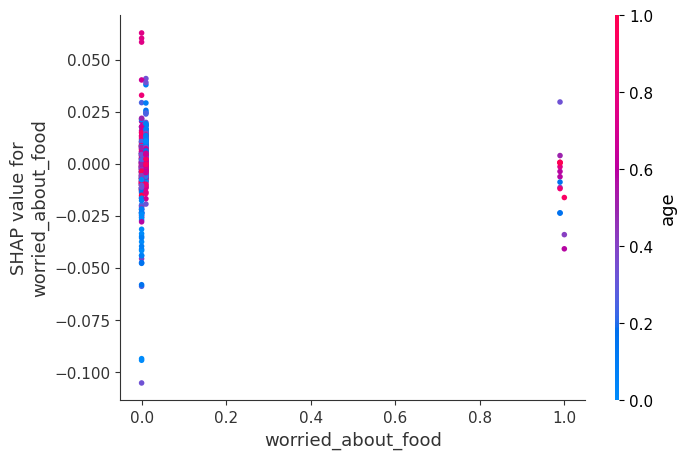

In [67]:
shap.dependence_plot("worried_about_food", shap_values_subset, X_test_subset)